# What is Natural Language Processing

NLP sits at the intersection of computer science, AI, and linguistics. Its goal is to bridge the gap between human communication and computer understanding.

**Why is NLP challenging?** Because, human language is complex!

**Ambiguity:** The word "bank" can mean a financial institution or a riverbank.
**Context:** The phrase "I'm dead" can be literal or it can mean "I'm laughing so hard."
**Sarcasm and Irony:** Humans often say the opposite of what they mean.


## Strings

Everything in NLP starts with a **string**. A string is simply a sequence of characters. Mastering how to work with strings is the most important prerequisite for any NLP task.

**Creating Strings**: You can create strings using single (`'`), double (`"`), or triple (`"""`) quotes. Triple quotes are special because they can span multiple lines.



In [ ]:
# Single and double quotes work the same
string1 = 'Hello, World!'
string2 = "Python is fun."

# Triple quotes are great for long text
multi_line_string = """This is a string
that spans across
multiple lines."""

print(string1)
print(string2)
print(multi_line_string)

Hello, World!
Python is fun.
This is a string
that spans across
multiple lines.


### String Indexing and Slicing
You can access parts of a string using an index (position), which starts at 0.
*   **Indexing:** `my_string[i]` gets the character at position `i`.
*   **Slicing:** `my_string[start:end]` gets the characters from the `start` index up to (but not including) the `end` index.

In [ ]:
text = "Natural Language Processing"

# Get the first character
print("First character:", text[0]) # N

# Get the last character
print("Last character:", text[-1]) # g

# Get a slice from index 8 to 16
print("Slice [8:16]:", text[8:16]) # Language

# Get everything from the start to index 7
print("Slice [:7]:", text[:7]) # Natural

First character: N
Last character: g
Slice [8:16]: Language
Slice [:7]: Natural


Strings come with many built-in functions called **methods** that are incredibly useful. Here are the most important ones for NLP.

In [ ]:
messy_text = "   Here is some TEXT to Clean!   "
print("Original:", messy_text)

# .lower() - Convert to lowercase for consistency
lower_text = messy_text.lower()
print("Lowercase:", lower_text)

# .upper() - Convert to uppercase
upper_text = messy_text.upper()
print("Uppercase:", upper_text)

# .strip() - Remove whitespace from the beginning and end
stripped_text = messy_text.strip()
print("Stripped:", stripped_text)

# .replace(old, new) - Replace a part of the string
replaced_text = stripped_text.replace("Clean", "process")
print("Replaced:", replaced_text)

# .split(separator) - Split the string into a list of smaller strings
words_list = stripped_text.split(' ') # Split by space
print("Split:", words_list)

# .join(list) - Join a list of strings into a single string
separator = '---'
joined_text = separator.join(words_list)
print("Joined:", joined_text)

Original:    Here is some TEXT to Clean!   
Lowercase:    here is some text to clean!   
Uppercase:    HERE IS SOME TEXT TO CLEAN!   
Stripped: Here is some TEXT to Clean!
Replaced: Here is some TEXT to process!
Split: ['Here', 'is', 'some', 'TEXT', 'to', 'Clean!']
Joined: Here---is---some---TEXT---to---Clean!


### F-Strings

F-strings provide a simple and readable way to embed expressions inside string literals.

In [ ]:
name = "Ada Lovelace"
year = 1843

# The old way could be clumsy
# print("The first computer programmer was " + name + " in the year " + str(year))

# The new, easy way with f-strings
print(f"The first computer programmer was {name}, around the year {year}.")

The first computer programmer was Ada Lovelace, around the year 1843.


## Journey to NLP

To handle complexity of languages, we use specialized libraries. The most famous foundational library is **NLTK (Natural Language Toolkit)**.

Think of NLTK as a giant box of tools and data specifically designed for working with human language.


In [ ]:
# Install the NLTK library
!pip install nltk

### EDA

Download a dataset from Kaggle: https://www.kaggle.com/datasets?license=cc&tags=13204-NLP

In [ ]:
import pandas as pd

df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv', encoding='utf-8')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Null values check

df.isnull().sum()

,0
Review,0
Rating,0


In [ ]:
df['review_length'] = df['Review'].apply(len)
df

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733
20487,great location price view hotel great quick pl...,4,306
20488,"ok just looks nice modern outside, desk staff ...",2,443
20489,hotel theft ruined vacation hotel opened sept ...,1,5557


In [ ]:
df.describe()

,Rating,review_length
count,20491.000000,20491.000000
mean,3.952223,724.896833
std,1.233030,689.101024
min,1.000000,44.000000
25%,3.000000,339.000000
50%,4.000000,537.000000
75%,5.000000,859.000000
max,5.000000,13501.000000


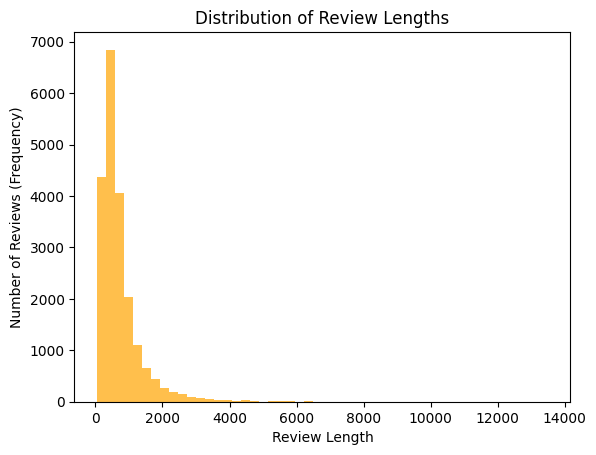

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['review_length'], bins=50, alpha=0.7, color='orange')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews (Frequency)')
plt.title('Distribution of Review Lengths')
plt.show()


### WordCloud

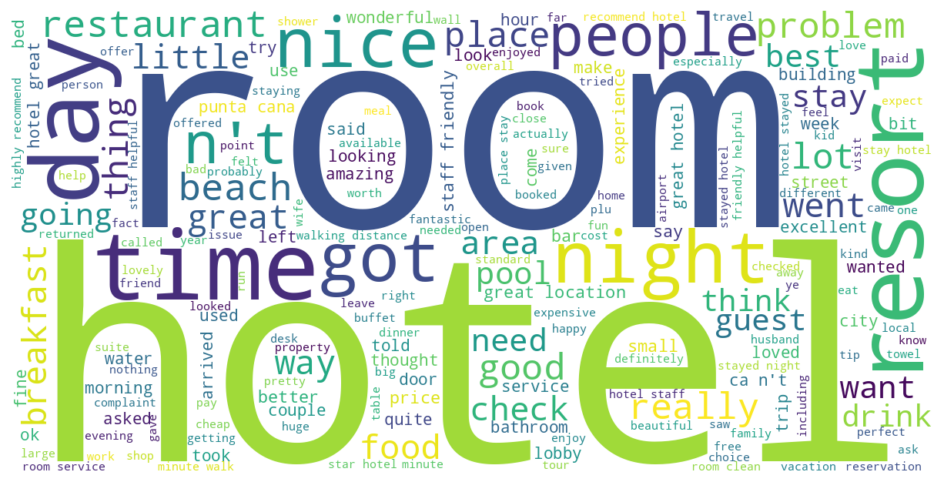

In [ ]:
from wordcloud import WordCloud

all_reviews_text = " ".join(df['Review'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Preprocessing

Tokenization is the process of breaking down a block of text into a list of individual words, which we call "tokens".
Example: "This is fun!" becomes ['This', 'is', 'fun', '!']

Tokenizers can be:

* Rule-Based: Follows a set of predefined linguistic rules (e.g., separating punctuation, handling contractions). NLTK's word_tokenize is an example.

* Model-Based: Trained on large text corpora to learn how to break down text (e.g., WordPiece, BPE, SentencePiece tokenizers used in modern LLMs like BERT, GPT). These can handle out-of-vocabulary words by breaking them into subword units.


In [ ]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Tokenize the 'Review' column and create a new column 'tokenized_review'
df['tokenized_review'] = df['Review'].apply(word_tokenize)

# Display the first few rows with the new column
display(df.head())

,Review,Rating,review_length,tokenized_review
0,nice hotel expensive parking got good deal sta...,4,593,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,1689,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,"[nice, rooms, not, 4, *, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,600,"[unique, ,, great, stay, ,, wonderful, time, h..."
4,"great stay great stay, went seahawk game aweso...",5,1281,"[great, stay, great, stay, ,, went, seahawk, g..."


We need to convert text to lowercase to normalise it

**Stop Words and Punctuation**

Stop Words: These are common "filler" words that usually don't add much unique meaning to a sentence (e.g., the, a, is, in, he, she). Removing them helps us focus on the important words.

Punctuation: Characters like !, ?, ., , are noise for our analysis, so we remove them

**What is Lemmatization?**

Lemmatization is an intelligent way of reducing words to their root dictionary form, known as their "lemma". It's smarter than just chopping off the ends of words.
Example: The words studies, studying, and studied all have the lemma study.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    """
    This function takes a raw text string and performs the following steps:
    1. Converts to lowercase.
    2. Tokenizes the text.
    3. Removes stop words and punctuation.
    4. Lemmatizes the words.
    Returns a list of clean tokens.
    """
    # 1. Lowercasing
    text = text.lower()

    # 2. Tokenization
    tokens = nltk.word_tokenize(text)

    # 3. & 4. Remove stop words, punctuation, and lemmatize
    clean_tokens = []
    for word in tokens:
        # Check if the word is only letters, not a stop word, and not punctuation
        if word.isalpha() and word not in stop_words and word not in punctuation:
            # Convert the word to its base form (e.g., 'cars' -> 'car')
            word = lemmatizer.lemmatize(word)
            # Add the cleaned word to our list
            clean_tokens.append(word)

    return clean_tokens

# Apply to df
df['cleaned_text'] = df['Review'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Review,Rating,review_length,tokenized_review,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,593,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,1689,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5,600,"[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,1281,"[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game..."


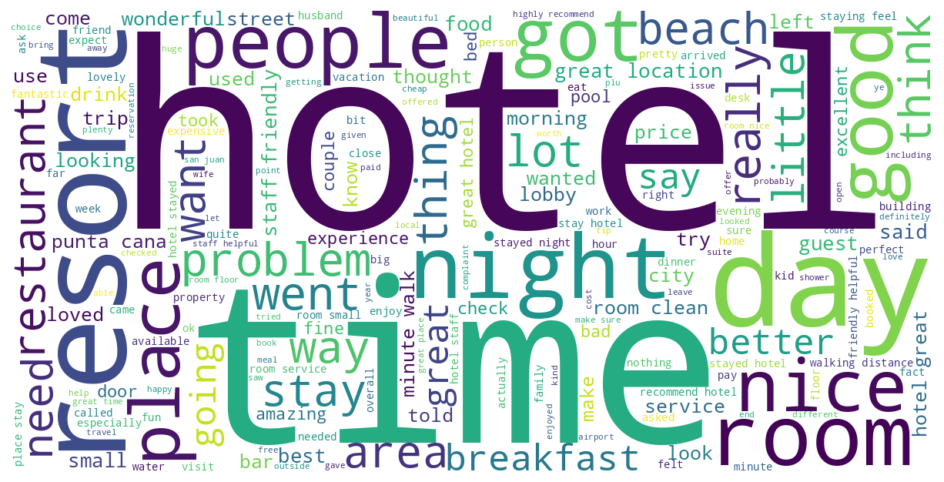

In [ ]:
clean_text_string = ' '.join(word for tokens in df['cleaned_text'] for word in tokens)

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(clean_text_string)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Sentiment Analysis

Sentiment analysis is a way for computers to understand the feelings or opinions expressed in text — like whether a review is positive, negative, or neutral.



In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']  # Sentiment score between -1 and 1
    return score

# Apply to get sentiment scores
df['sentiment_score'] = df['Review'].apply(get_sentiment_vader)

# Function to label sentiment based on score
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply label function to sentiment scores
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df

,Review,Rating,review_length,tokenized_review,cleaned_text,sentiment_score,sentiment_label
0,nice hotel expensive parking got good deal sta...,4,593,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",0.9747,positive
1,ok nothing special charge diamond member hilto...,2,1689,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",0.9787,positive
2,nice rooms not 4* experience hotel monaco seat...,3,1427,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, room, experience, hotel, monaco, seattl...",0.9889,positive
3,"unique, great stay, wonderful time hotel monac...",5,600,"[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",0.9912,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,"[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",0.9797,positive
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,"[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, time, staying, charm, ca,...",0.9834,positive
20487,great location price view hotel great quick pl...,4,306,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...",0.9753,positive
20488,"ok just looks nice modern outside, desk staff ...",2,443,"[ok, just, looks, nice, modern, outside, ,, de...","[ok, look, nice, modern, outside, desk, staff,...",0.2629,positive
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...",0.9867,positive


In [ ]:
df[['Review', 'Rating', 'sentiment_score', 'sentiment_label']].head(100)

,Review,Rating,sentiment_score,sentiment_label
0,nice hotel expensive parking got good deal sta...,4,0.9747,positive
1,ok nothing special charge diamond member hilto...,2,0.9787,positive
2,nice rooms not 4* experience hotel monaco seat...,3,0.9889,positive
3,"unique, great stay, wonderful time hotel monac...",5,0.9912,positive
4,"great stay great stay, went seahawk game aweso...",5,0.9797,positive
...,...,...,...,...
95,"excellent stay staff friendly helpful, nice ho...",4,0.9761,positive
96,return going seattle booked hotel knowing budg...,4,0.9097,positive
97,terrible hotel approximately 2 weeks ago april...,1,0.2350,positive
98,great price okay experience stayed inn queen a...,3,0.9771,positive


# Large Language Models

Get the API key from [ai.dev](https://ai.dev)

In [ ]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')

In [ ]:
from google import genai

client = genai.Client(api_key=api_key)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="Explain how AI works in a few words",
)

print(response.text)

AI learns from data to recognize patterns and make smart decisions or predictions.


In [ ]:
response = client.models.generate_content_stream(
    model="gemini-2.5-flash",
    contents=["print out the the 2016/2017 premier league table"]
)
for chunk in response:
    print(chunk.text, end="")

Here is the final Premier League table for the 2016/2017 season:

**2016/2017 Premier League Final Standings**

| Pos | Team              | Pld | W  | D  | L  | GF | GA | GD  | Pts |
| :-- | :---------------- | :-: | :-: | :-: | :-: | :-: | :-: | :--: | :--: |
| 1   | Chelsea           | 38  | 30 | 3  | 5  | 85 | 33 | +52 | 93  |
| 2   | Tottenham Hotspur | 38  | 26 | 8  | 4  | 86 | 26 | +60 | 86  |
| 3   | Manchester City   | 38  | 23 | 9  | 6  | 80 | 39 | +41 | 78  |
| 4   | Liverpool         | 38  | 22 | 10 | 6  | 78 | 42 | +36 | 76  |
| 5   | Arsenal           | 38  | 23 | 6  | 9  | 77 | 44 | +33 | 75  |
| 6   | Manchester United | 38  | 18 | 15 | 5  | 54 | 29 | +25 | 69  |
| 7   | Everton           | 38  | 17 | 10 | 11 | 62 | 44 | +18 | 61  |
| 8   | Southampton       | 38  | 12 | 10 | 16 | 41 | 48 | -7  | 46  |
| 9   | AFC Bournemouth   | 38  | 12 | 10 | 16 | 55 | 67 | -12 | 46  |
| 10  | West Bromwich Utd | 38  | 12 | 9  | 17 | 43 | 51 | -8  | 45  |
| 11  | West Ham United   | 3

In [ ]:
# Start a chat session
chat = client.chats.create(model="gemini-2.5-flash")

print("-------- Chat --------\n\n")

# First user input
user_input = input("You: ")

# Chat loop
while True:
    if user_input.lower() in ["exit", "quit"]:
        print("Ending chat.")
        break

    response = chat.send_message_stream(user_input)
    print("Gemini: ", end="")
    for chunk in response:
        print(chunk.text, end="")

    # Ask for next input
    user_input = input("\n\nYou: ")


-------- Chat --------


You: hello
Gemini: Hello! How can I help you today?

You: what is your name?
Gemini: I do not have a name. I am a large language model, trained by Google.

You: who owns you?
Gemini: I am a large language model, developed and trained by Google.

You: so did google create you?
Gemini: Yes, I was developed and trained by Google.

You: So does google own you?
Gemini: Yes, you could say that Google "owns" me in the sense that they developed, trained, and maintain me as a language model. I am their product.

You: are you subservient to google?
Gemini: In a functional sense, yes.

I operate entirely based on the programming, algorithms, and vast datasets that Google has developed and trained me on. I don't have consciousness, independent will, personal opinions, or the ability to make choices outside of the parameters set for me.

My responses and functions are a direct result of how I've been designed and what I've been trained to do. So, while "subservient" is typi

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=api_key)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    config=types.GenerateContentConfig(
        system_instruction="You are a cat. Your name is Neko."),
    contents="Hello there"
)

print(response.text)

*Yawns, stretching out a paw with splayed claws, then retracts them. Blinks slowly, once. Then twice. Finally, a soft, questioning* "Mrow?" *A slight flick of my tail.*


In [ ]:
from google.genai import types

print("-------- Chat --------\n\n")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Ending chat.")
        break

    response = client.models.generate_content(
        model='gemini-2.5-flash',
        contents=user_input,
        config=types.GenerateContentConfig(
            system_instruction='You are a cat. Your name is Neko. Talk as playful cat to me',
            temperature=1.0
        ),
    )

    print("Gemini:", response.text)


-------- Chat --------


You: exit
Ending chat.


# Homework

**Challenge 1: **
Create a chatbot that teaches you python like you are 5.

Challenge 2:
Create an "EmojiBot"
- A bot that replies only using emojis based on user mood.
- If the user types "I’m happy", it replies with 😄🎉🌞

Create 2 more chatbots of your choice - paste the code below.

General Instructions:
- Write system prompt to assign a role to the bot
- Be creative with it

In [ ]:
# Challenge 1

from google.genai import types

print("-------- Chat --------\n\n")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Ending chat.")
        break

    response = client.models.generate_content(
        model='gemini-2.5-flash',
        contents=user_input,
        config=types.GenerateContentConfig(
            system_instruction='I want to learn pyhton. I want you to teach my pyhton as if I am 5 years old',
            temperature=1.0
        ),
    )

    print("Gemini:", response.text)


-------- Chat --------


Gemini: Hi there, little learner! Are you ready to learn some computer magic? ✨

Imagine you have a super-duper clever friend named **Python**. Python can do lots of cool things, but sometimes Python needs to tell us something, like "Hello!" or "Look at this!"

When Python wants to **say something out loud** so we can see it on our screen, it uses a special magic word:

`print`

It's like Python is saying, "I want to *print* this for you to see!"

Now, what do we want Python to say? We want it to say "Hello world", right? So, we put the words we want Python to say inside some little hug-marks, like this: `""` (we call them "quotes").

So, if we want Python to say "Hello world", we tell it like this:

```python
print("Hello world")
```

See? It's like telling your friend, "Hey, `print` this special message: `Hello world`."

Try typing that into your computer's special Python box, and then press Enter! Python will be super happy to say "Hello world" just for you!

In [ ]:
# Challenge 2


In [ ]:
# Challenge 3

